In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
shots = pd.read_csv('./shots/all_year_shot_data.csv')

In [15]:
shots

,Unnamed: 0,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,0,Shot Chart Detail,21800009,11,201935,James Harden,1610612745,Houston Rockets,1,11,...,Center(C),Less Than 8 ft.,1,3,12,1,0,20181017,HOU,NOP
1,1,Shot Chart Detail,21800009,28,201935,James Harden,1610612745,Houston Rockets,1,9,...,Center(C),24+ ft.,27,-61,264,1,0,20181017,HOU,NOP
2,2,Shot Chart Detail,21800009,55,201935,James Harden,1610612745,Houston Rockets,1,7,...,Center(C),24+ ft.,25,-1,259,1,0,20181017,HOU,NOP
3,3,Shot Chart Detail,21800009,103,201935,James Harden,1610612745,Houston Rockets,1,4,...,Left Side Center(LC),24+ ft.,26,-120,232,1,1,20181017,HOU,NOP
4,4,Shot Chart Detail,21800009,246,201935,James Harden,1610612745,Houston Rockets,2,6,...,Center(C),Less Than 8 ft.,2,3,20,1,1,20181017,HOU,NOP
5,5,Shot Chart Detail,21800009,272,201935,James Harden,1610612745,Houston Rockets,2,4,...,Center(C),Less Than 8 ft.,1,2,13,1,0,20181017,HOU,NOP
6,6,Shot Chart Detail,21800009,282,201935,James Harden,1610612745,Houston Rockets,2,4,...,Center(C),Less Than 8 ft.,1,0,17,1,1,20181017,HOU,NOP
7,7,Shot Chart Detail,21800009,321,201935,James Harden,1610612745,Houston Rockets,2,1,...,Center(C),Less Than 8 ft.,7,26,65,1,0,20181017,HOU,NOP
8,8,Shot Chart Detail,21800009,380,201935,James Harden,1610612745,Houston Rockets,3,10,...,Left Side Center(LC),24+ ft.,24,-160,180,1,0,20181017,HOU,NOP
9,9,Shot Chart Detail,21800009,421,201935,James Harden,1610612745,Houston Rockets,3,6,...,Center(C),Less Than 8 ft.,0,2,9,1,1,20181017,HOU,NOP


In [5]:
shots_by_area = shots[['SHOT_ZONE_AREA', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG']].groupby('SHOT_ZONE_AREA').sum()
shots_by_area['SHOT_MISSED_FLAG'] = shots_by_area['SHOT_ATTEMPTED_FLAG'] - shots_by_area['SHOT_MADE_FLAG']
shots_by_area['SHOT_PERCENTAGE'] = round(shots_by_area['SHOT_MADE_FLAG'] / shots_by_area['SHOT_ATTEMPTED_FLAG'] * 100, 2)
shots_by_area

,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,SHOT_MISSED_FLAG,SHOT_PERCENTAGE
SHOT_ZONE_AREA,,,,
Back Court(BC),25,3,22,12.00
Center(C),4328,2330,1998,53.84
Left Side Center(LC),992,370,622,37.30
Left Side(L),452,181,271,40.04
Right Side Center(RC),1126,430,696,38.19
Right Side(R),386,169,217,43.78


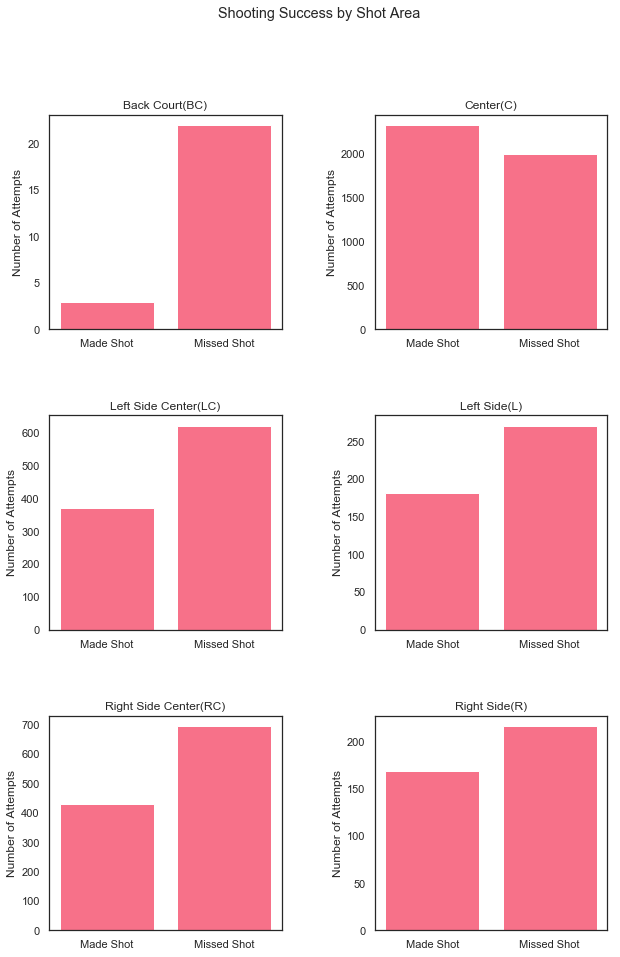

In [10]:
sns.set(style='white', palette='husl')
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
for a in range(len(shots_by_area)):
    i = a//2
    j = a%2
    axes[i, j].bar(x=['Made Shot', 'Missed Shot'], height=shots_by_area.iloc[a, 1:3])
    axes[i, j].set_ylabel('Number of Attempts')
    axes[i, j].set_title(shots_by_area.index.values[a])

fig.suptitle('Shooting Success by Shot Area')
fig.subplots_adjust(wspace=0.4, hspace=0.4)

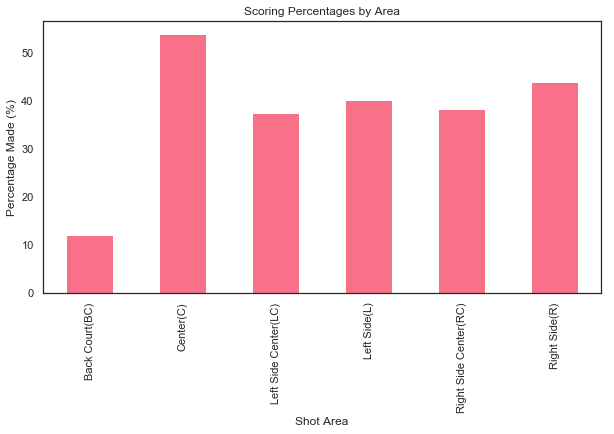

In [14]:
shots_by_area['SHOT_PERCENTAGE'].plot.bar(figsize=(10, 5))
plt.title('Scoring Percentages by Area')
plt.ylabel('Percentage Made (%)')
plt.xlabel('Shot Area')
plt.rcParams.update({'font.size': 10})

In [25]:
# For each shot, what percentage of players take this shot
shots_by_player = shots[['PLAYER_NAME', 'PLAYER_ID', 'SHOT_ZONE_AREA']]
dummies = pd.getdummies(shots['SHOT_ZONE_AREA'])

AttributeError: 'DataFrame' object has no attribute 'getdummies'